In [32]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[

In [34]:
# Loading the data

df = pd.read_csv('csv_order\BillieEilish.csv')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\rajro\AppData\Local\Temp\ipykernel_32332\613809166.py:3: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('csv_order\BillieEilish.csv')


,Artist,Title,Album,Date,Lyric,Year
0,Billie Eilish,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",2018-10-17,don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,2018.0
1,Billie Eilish,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Target Exclusive)",2019-11-13,i had a dream i got everything i wanted not what you'd think and if i'm bein' honest it might've been a nightmare to anyone who might care thought i could fly fly so i stepped off the golden mm nobody cried cried cried cried cried nobody even noticed i saw them standing right there kinda thought they might care might care might care pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' i tried to scream but my head was underwater they called me weak like i'm not just somebody's daughter coulda been a nightmare but it felt like they were right there and it feels like yesterday was a year ago but i don't wanna let anybody know 'cause everybody wants something from me now and i don't wanna let 'em down pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead,2019.0
2,Billie Eilish,​bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",2019-03-29,white shirt now red my bloody nose sleepin' you're on your tippy toes creepin' around like no one knows think you're so criminal bruises on both my knees for you don't say thank you or please i do what i want when i'm wanting to my soul so cynical so you're a tough guy like it really rough guy just can't get enough guy chest always so puffed guy i'm that bad type make your mama sad type make your girlfriend mad tight might seduce your dad type i'm the bad guy duh post i'm the bad guy i like it when you take control even if you know that you don't own me i'll let you play the role i'll be your animal my mommy likes to sing along with me but she won't sing this song if she reads all the lyrics she'll pity the men i know so you're a tough guy like it really rough guy just can't get enough guy chest always so puffed guy i'm that bad type make your mama sad type make your girlfriend mad tight might seduce your dad type i'm the bad guy duh post i'm the bad guy duh i'm only good at bein' bad bad i like when you get mad i guess i'm pretty glad that you're alone you said she's scared of me i mean i don't see what she sees but maybe it's 'cause i'm wearing your cologne i'm a bad guy i'm i'm a bad guy bad guy bad guy i'm a bad,2019.0
3,Billi

**Data Cleaning**

In [35]:
# Removing irrelevant columns
df.drop(['Artist', 'Year', 'Date'], axis=1, inplace = True)
df.head()

,Title,Album,Lyric
0,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that
1,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Target Exclusive)",i had a dream i got everything i wanted not what you'd think and if i'm bein' honest it might've been a nightmare to anyone who might care thought i could fly fly so i stepped off the golden mm nobody cried cried cried cried cried nobody even noticed i saw them standing right there kinda thought they might care might care might care pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' i tried to scream but my head was underwater they called me weak like i'm not just somebody's daughter coulda been a nightmare but it felt like they were right there and it feels like yesterday was a year ago but i don't wanna let anybody know 'cause everybody wants something from me now and i don't wanna let 'em down pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead
2,​bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",white shirt now red my bloody nose sleepin' you're on your tippy toes creepin' around like no one knows think you're so criminal bruises on both my knees for you don't say thank you or please i do what i want when i'm wanting to my soul so cynical so you're a tough guy like it really rough guy just can't get enough guy chest always so puffed guy i'm that bad type make your mama sad type make your girlfriend mad tight might seduce your dad type i'm the bad guy duh post i'm the bad guy i like it when you take control even if you know that you don't own me i'll let you play the role i'll be your animal my mommy likes to sing along with me but she won't sing this song if she reads all the lyrics she'll pity the men i know so you're a tough guy like it really rough guy just can't get enough guy chest always so puffed guy i'm that bad type make your mama sad type make your girlfriend mad tight might seduce your dad type i'm the bad guy duh post i'm the bad guy duh i'm only good at bein' bad bad i like when you get mad i guess i'm pretty glad that you're alone you said she's scared of me i mean i don't see what she sees but maybe it's 'cause i'm wearing your cologne i'm a bad guy i'm i'm a bad guy bad guy bad guy i'm a bad
3,​idontwannabeyouanymore,dont smile at me,don't be that way fall apart twice a day i just wish you could feel what you 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   145 non-null    object
 1   Album   145 non-null    object
 2   Lyric   145 non-null    object
dtypes: object(3)
memory usage: 3.5+ KB


In [37]:
# Since there are NaN in Lyric column, casting the column type as string
# Then NaN will be removed later

df = df.astype({'Lyric':'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   145 non-null    object
 1   Album   145 non-null    object
 2   Lyric   145 non-null    object
dtypes: object(3)
memory usage: 3.5+ KB


In [38]:
df.shape

(145, 3)

In [39]:
# As can be seen in the df, there are artist names in the Lyric
# Listing the possible names mentioned here

name_list = [
'billie', 'billie eilish', 'pirate', 'bellyache', 'bad guy', 'william eyelash',
'finneas', 'finneas o\'connell', 'justin bieber', 'khalid', 'rosalía',
'donald glover', 'childish gambino', 'vince staples', 'james bond',
'michael jackson', 'johnny depp', 'dave grohl', 'dave', 'tyler the creator',
'barack obama', 'drake', 'justin timberlake', 'britney spears', 'madonna',
'barbara', 'henry', 'shirley temple', 'frank sinatra', 'claudia', 'andy',
'mary jane', 'edwin', 'kate', 'jim', 'lucy', 'jesse', 'matthew', 'eilish'
]
names = '|'.join(name_list)

df[df['Lyric'].str.contains(names)]

,Title,Album,Lyric
2,​bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",white shirt now red my bloody nose sleepin' you're on your tippy toes creepin' around like no one knows think you're so criminal bruises on both my knees for you don't say thank you or please i do what i want when i'm wanting to my soul so cynical so you're a tough guy like it really rough guy just can't get enough guy chest always so puffed guy i'm that bad type make your mama sad type make your girlfriend mad tight might seduce your dad type i'm the bad guy duh post i'm the bad guy i like it when you take control even if you know that you don't own me i'll let you play the role i'll be your animal my mommy likes to sing along with me but she won't sing this song if she reads all the lyrics she'll pity the men i know so you're a tough guy like it really rough guy just can't get enough guy chest always so puffed guy i'm that bad type make your mama sad type make your girlfriend mad tight might seduce your dad type i'm the bad guy duh post i'm the bad guy duh i'm only good at bein' bad bad i like when you get mad i guess i'm pretty glad that you're alone you said she's scared of me i mean i don't see what she sees but maybe it's 'cause i'm wearing your cologne i'm a bad guy i'm i'm a bad guy bad guy bad guy i'm a bad
4,​bury a friend,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",mehki raine billie billie eilish what do you want from me why don't you run from me what are you wondering what do you know why aren't you scared of me why do you care for me when we all fall asleep where do we go billie eilish mehki raine come here say it spit it out what is it exactly you're payin' is the amount cleanin' you out am i satisfactory today i'm thinkin' about the things that are deadly the way i'm drinkin' you down like i wanna drown like i wanna end me refrain billie eilish step on the glass staple your tongue ahh bury a friend try to wake up ahahh cannibal class killing the son ahh bury a friend i wanna end me pre billie eilish i wanna end me i wanna i wanna i wanna end me i wanna i wanna i wanna billie eilish what do you want from me why don't you run from me what are you wondering what do you know why aren't you scared of me why do you care for me when we all fall asleep where do we go billie eilish mehki raine listen keep you in the dark what had you expected me to make you my art and make you a star and get you connected i'll meet you in the park i'll be calm and collected but we knew right from the start that you'd fall apart 'cause i'm too expensive it's probably somethin' that shouldn't be said out loud honestly i thought that i would be dead by now wow calling security keepin' my head held down bury the hatchet or bury a friend right now billie eilish mehki raine the debt i owe gotta sell my soul 'cause i can't say no no i can't say no then my limbs all froze and my eyes won't close and i can't say no i can't say no careful refrain billie eilish step on the glass staple your tongue ahh bury a friend try to wake up ahahh cannibal class killing the son ahh bury a friend i wanna end me pre billie eilish i wanna end me i wanna i wanna i wanna end me i wanna i wanna i wanna billie eilish what do you want from me why don't you run from me what are you wondering what do you know why aren't you scared of me why do you care for me when we all fall asleep where do we go
10,​bellyache,dont smile at me,mind mind sittin' all alone mouth full of gum in the driveway my friends aren't far in the back of my car lay their bodies pre where's my mind where's my mind they'll be here pretty soon lookin' through my room for the money i'm bitin' my nails i'm too young to go to jail it's kinda funny pre where's my mind where's my mind where's my mind where's my mind maybe it's in the gutter where i left my lover what an expensive fake my v is for vendetta thought that i'd feel better but now i got a bellyache mind everything i do the way i wear my no

In [40]:
# Function to clean lyrics

def cleaning_lyrics(lyric):
    if lyric != "nan":
        for name in name_list:
            lyric = lyric.replace(name, '').strip()
            lyric = lyric.lower()
    else:
        lyric = lyric.replace("nan", '').strip()
    return lyric

# Apply the function to the 'Lyric' column

df['Cleaned Lyric'] = df['Lyric'].apply(cleaning_lyrics)
df

,Title,Album,Lyric,Cleaned Lyric
0,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that
1,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Target Exclusive)",i had a dream i got everything i wanted not what you'd think and if i'm bein' honest it might've been a nightmare to anyone who might care thought i could fly fly so i stepped off the golden mm nobody cried cried cried cried cried nobody even noticed i saw them standing right there kinda thought they might care might care might care pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' i tried to scream but my head was underwater they called me weak like i'm not just somebody's daughter coulda been a nightmare but it felt like they were right there and it feels like yesterday was a year ago but i don't wanna let anybody know 'cause everybody wants something from me now and i don't wanna let 'em down pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead,i had a dream i got everything i wanted not what you'd think and if i'm bein' honest it might've been a nightmare to anyone who might care thought i could fly fly so i stepped off the golden mm nobody cried cried cried cried cried nobody even noticed i saw them standing right there kinda thought they might care might care might care pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that yo

In [41]:
# Generating Wordcloud

STOPWORDS = STOPWORDS

wc = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        height=2000,
        width=2000,
        max_words=200, 
        min_font_size=10, 
        relative_scaling=0.5
)

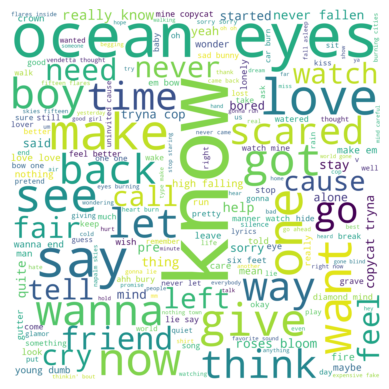

In [42]:
wc.generate(df['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Text Analysis using TextBlob**

In [43]:
# Removing stopwords and tokenizing cleaned lyrics for sentiment analysis

def tokenizing(lyrics):
    tokens = word_tokenize(lyrics)
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords.words('english'):
            filtered_tokens.append(token)
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

df['Tokenized Lyric'] = df['Cleaned Lyric'].apply(tokenizing)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric
0,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,n't know 'm good 've learned lose ca n't afford tore shirt stop bleedin ' nothin ' ever stops leavin ' quiet 'm coming home 'm could lie say like like like like could lie say like like like like n't know much already 'll hurt let call friend keep closer call back 'll call party 's quiet 'm coming home 'm could lie say like like like like yeah could lie say like like like like nothin ' better sometimes 've said goodbyes let 's let go let let go quiet 'm coming home 'm could lie say like like like like could lie say like like like like
1,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Target Exclusive)",i had a dream i got everything i wanted not what you'd think and if i'm bein' honest it might've been a nightmare to anyone who might care thought i could fly fly so i stepped off the golden mm nobody cried cried cried cried cried nobody even noticed i saw them standing right there kinda thought they might care might care might care pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' i tried to scream but my head was underwater they called me weak like i'm not just somebody's daughter coulda been a nightmare but it felt like they were right there and it feels like yesterday was a year ago but i don't wanna let anybody know 'cause everybody wants something from me now and i don't wanna let 'em down pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they

In [44]:
# Sentiment analysis using VADER

sia = SentimentIntensityAnalyzer()

In [45]:
def sentiment(tokenized):
    sentiment_score = sia.polarity_scores(tokenized)
    
    return sentiment_score

df['Sentiment Score'] = df['Tokenized Lyric'].apply(sentiment)

df[['Neg', 'Neu', 'Pos', 'Compound']] = df['Sentiment Score'].apply(pd.Series)

df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound
0,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,n't know 'm good 've learned lose ca n't afford tore shirt stop bleedin ' nothin ' ever stops leavin ' quiet 'm coming home 'm could lie say like like like like could lie say like like like like n't know much already 'll hurt let call friend keep closer call back 'll call party 's quiet 'm coming home 'm could lie say like like like like yeah could lie say like like like like nothin ' better sometimes 've said goodbyes let 's let go let let go quiet 'm coming home 'm could lie say like like like like could lie say like like like like,"{'neg': 0.079, 'neu': 0.467, 'pos': 0.454, 'compound': 0.9942}",0.079,0.467,0.454,0.9942
1,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Target Exclusive)",i had a dream i got everything i wanted not what you'd think and if i'm bein' honest it might've been a nightmare to anyone who might care thought i could fly fly so i stepped off the golden mm nobody cried cried cried cried cried nobody even noticed i saw them standing right there kinda thought they might care might care might care pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' i tried to scream but my head was underwater they called me weak like i'm not just somebody's daughter coulda been a nightmare but it felt like they were right there and it feels like yesterday was a year ago but i don't wanna let anybody know 'cause everybody wants something from me now and i don't wanna let 'em down pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they say instead if i kn

In [46]:
# Categorize the sentiment as Positive, Neutral, and Negative

def categorize(x):
    if x > 0:
        return "Positive"
    if x < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Compound'].apply(categorize)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound,Sentiment
0,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)",don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,don't you know i'm no good for you i've learned to lose you can't afford to tore my shirt to stop you bleedin' but nothin' ever stops you leavin' quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that don't you know too much already i'll only hurt you if you let me call me friend but keep me closer call me back and i'll call you when the party's over quiet when i'm coming home and i'm on my own and i could lie say i like it like that like it like that yeah i could lie say i like it like that like it like that but nothin' is better sometimes once we've both said our goodbyes let's just let it go let me let you go quiet when i'm coming home and i'm on my own i could lie say i like it like that like it like that i could lie say i like it like that like it like that,n't know 'm good 've learned lose ca n't afford tore shirt stop bleedin ' nothin ' ever stops leavin ' quiet 'm coming home 'm could lie say like like like like could lie say like like like like n't know much already 'll hurt let call friend keep closer call back 'll call party 's quiet 'm coming home 'm could lie say like like like like yeah could lie say like like like like nothin ' better sometimes 've said goodbyes let 's let go let let go quiet 'm coming home 'm could lie say like like like like could lie say like like like like,"{'neg': 0.079, 'neu': 0.467, 'pos': 0.454, 'compound': 0.9942}",0.079,0.467,0.454,0.9942,Positive
1,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Target Exclusive)",i had a dream i got everything i wanted not what you'd think and if i'm bein' honest it might've been a nightmare to anyone who might care thought i could fly fly so i stepped off the golden mm nobody cried cried cried cried cried nobody even noticed i saw them standing right there kinda thought they might care might care might care pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' i tried to scream but my head was underwater they called me weak like i'm not just somebody's daughter coulda been a nightmare but it felt like they were right there and it feels like yesterday was a year ago but i don't wanna let anybody know 'cause everybody wants something from me now and i don't wanna let 'em down pre i had a dream i got everything i wanted but when i wake up i see you with me and you say as long as i'm here no one can hurt you don't wanna lie here but you can learn to if i could change the way that you see yourself you wouldn't wonder why you hear 'they don't deserve you' if i knew it all then would i do it again would i do it again if they knew what they said would go straight to my head what would they 

**Visualizing the Sentiment**

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

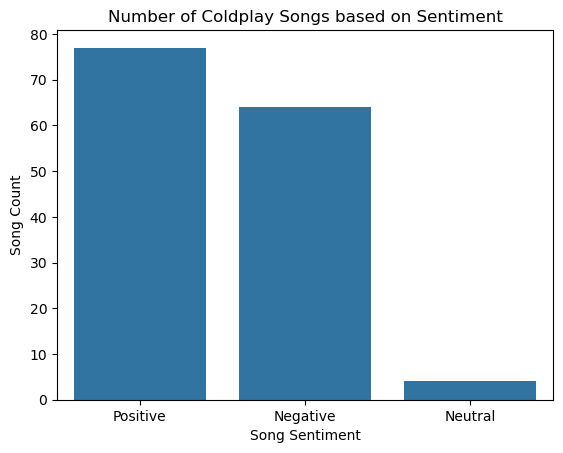

In [48]:
sns.countplot(x=df['Sentiment'], data=df).set(title='Number of Coldplay Songs based on Sentiment')
plt.xlabel('Song Sentiment')
plt.ylabel('Song Count')
plt.show()

**How's the sentiment in each album?**

In [49]:
album_sentiment = df.groupby('Album')['Compound'].mean().reset_index().sort_values(by='Compound', ascending = False).reset_index(drop=True)
album_sentiment.head()

,Album,Compound
0,13 Reasons Why (Season 1),0.988000
1,BE2*,0.975800
2,Billie Eilish Live at the Steve Jobs Theater,0.945600
3,party favor / hotline bling,0.920700
4,Six Feet Under (Remixes),0.912725


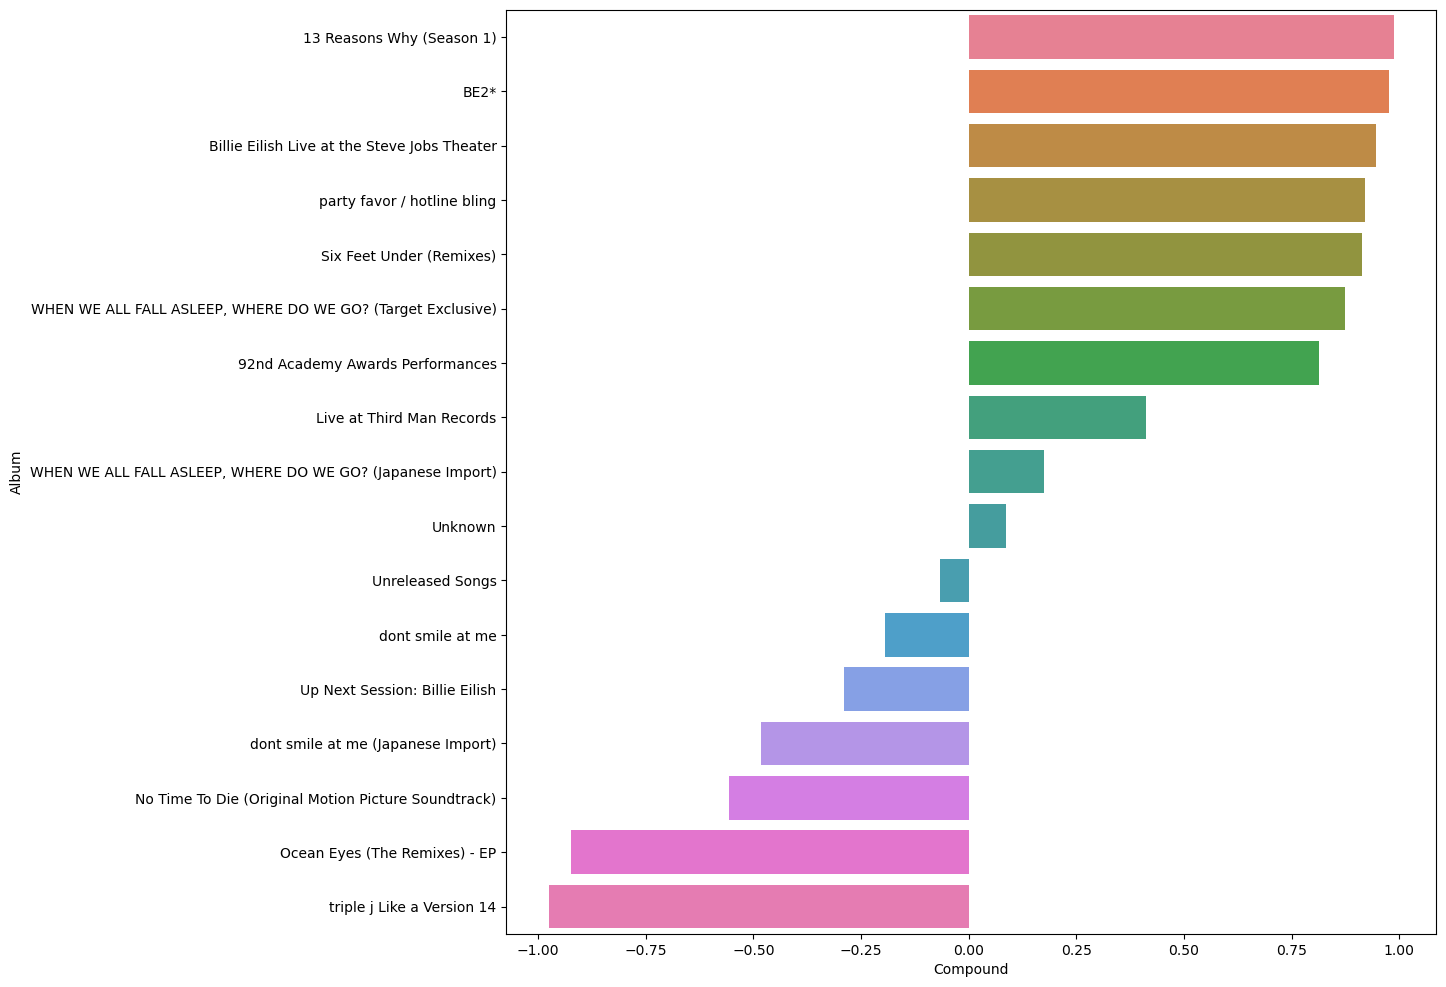

In [50]:
plt.figure(figsize =(12,12))
sns.barplot(x='Compound', y='Album', data = album_sentiment, hue='Album')
plt.show()

**Which songs has the most positive and most negative sentiment?**

In [51]:
pos_song = df[df['Compound'] == df['Compound'].max()]
neg_song = df[df['Compound'] == df['Compound'].min()]

print(f"The most positive song is {pos_song['Title'].to_string(index=False)} with a sentiment value of {pos_song['Compound'].to_string(index=False)}")
print(f"The most negative song is {neg_song['Title'].to_string(index=False)} with a sentiment value of {neg_song['Compound'].to_string(index=False)} ")

The most positive song is Paparazzi Instagram Monologue with a sentiment value of 0.9991
The most negative song is Young dumb and broke (cover) with a sentiment value of -0.9985 


In [52]:
pd.set_option('display.max_colwidth', None)

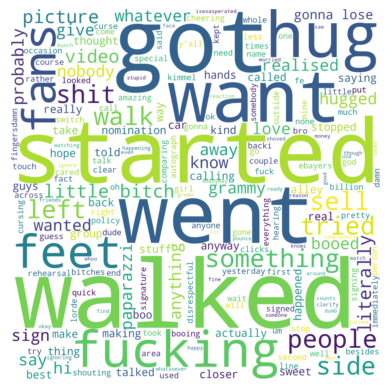

In [53]:
# Wordcloud of the most positive song

wc.generate(pos_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

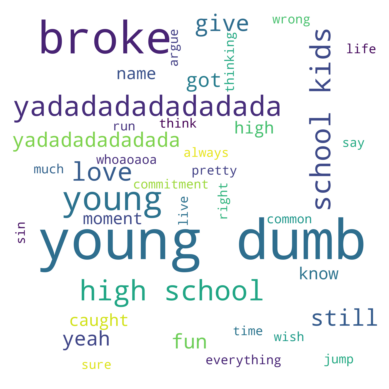

In [54]:
# Wordcloud of the most negative song

wc.generate(neg_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

From this analysis, here are some key takeaways:
1. The most common words in Billie Eilish songs are "ocean", "eye", "know" and "want"
2. Majority of Billie Eilish songs has compound sentiment, as half of her song conveys positive sentiment while half conveys a negative sense. In general perspective, her song conveys mixed sentiment
3. "Thank u, next" and "We love Disney" appears to be the most positive albums and "The Disney Family Singalong" is the most negative one
3. The most positive song is "Paparazzi Instagram Monologue" and words like "started", "want", "went", and "walked" are most spoken. 
4. On the other hand, "Young dumb and broke (cover)" is the most negative song in this database, which is manifested in the title itself. Words like  "young", "dumb" and "broke" are the most common one